<a href="https://colab.research.google.com/github/Roberto1-maths/Numerical-analysis-Python/blob/main/Splines270720_(1)_2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Splines

**Def**: Sea $a=x_0<x_1\cdots<x_n=b$. Una función $s:[a,b]\rightarrow \mathbb R$ es un Spline (funcióm Spline) de grado $m$          con nodos (puntos de interpolación) $x_0,x_1,\cdots,x_n$ si :
        
        

. $s$ es un polinomio en el subintervalo $[x_k,x_{k+1}]$ de grado a lo mas $m$

. $s$ es $m-1$ veces diferenciables en todos los puntos

*Ejemplo* Demuestre que la siguiente función es un spline de grado 1



%%latex
$$f(x)=\begin{cases} x+1 & \text{si $x\in [-1,0]$}\\
2x+1 & \text{si $x\in [0,1]$}\\
x+2 & \text{si $x\in [1,3]$}\end{cases}$$

Basta probar la continuidad en los nodos $0$ y $1$

*Ejemplo* decida si la siguiente función es un  Spline

%%latex
$$f(x)=\begin{cases} x^3 & \text{si $x\in [0,1]$}\\
2x^2-2x+1 & \text{si $x\in [1,2]$}\\
3x^2-6x+5 & \text{si $x\in [2,4]$}\end{cases}$$

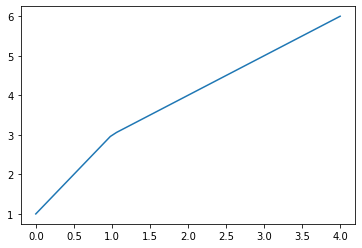

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
x=np.linspace(0,4,50)
choices=[ x>=1, x>=0, x>-1]
outcomes=[ x+2, 2*x+1, x+1 ]
k=np.select(choices, outcomes)
plt.plot(x,k)

In [ ]:
x=np.linspace(0,4,50)
choices=[ x<1, x>=1, x>2]
outcomes=[ x**3, 2*x**2-2*x+1, 3*x**2-6*x+5 ]
k=np.select(choices, outcomes)
plt.plot(x,k)

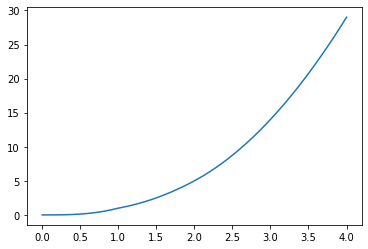

In [ ]:
m=np.piecewise(x, [x<1,x>=1,x>=2,  ], [lambda x:x**3,
lambda x:2*x**2-2*x+1 , lambda x: 3*x**2-6*x+5])
x=np.linspace(0,4,50)
plt.plot(x,m)


## Investiguemos los Splines lineales


**Def:**Un Spline lineal es una función cuya grafica es lineal por pedazos.
. Supongamos que tenemos los valores de $f$ en los nodos

$$a=x_0<x_1<\cdots<x_n=b$$

. y escogemos el spline lineal que satisface

$$s(x_k)=f(x_k) \quad k=0,1,\cdots,n$$

. en el intervalo $[x_k,x_{k+1}]$ , $s$ debe de ser un polinomio de grado 1

que pasa por los puntos $(x_k,f(x_k)) y (x_{k+1},f(x_{k+1}))$.

. Entonces la ecuación de esta linea es :

$$y=f(x_k)+\frac{f_{k+1}-f_k}{x_{k+1}-x_k}(x-x_k) \quad (1)$$

donde $f_k=f(x_k)$, la ecuación (1) con $k=0,1,\cdots,n-1$ se usa para definir el Spline requerido .

. En este caso es fácil escribir  las fórmulas para los diferentes coeficientes de los componentes del Spline

. Sea $s_k$ la componente de $s$ en el intervalo $[x_k,x_{k+1}]$ obtenemos

$$s_k(x)=a_k+b_k(x-x_k) \quad (1)$$

. De la ecuación (1) tenemos :
  
  . $$a_k=f_k \quad (2)$$
  
  . $$b_k=\frac{f_{k+1}-f_k}{x_{k+1}-x_k} \quad (3) $$



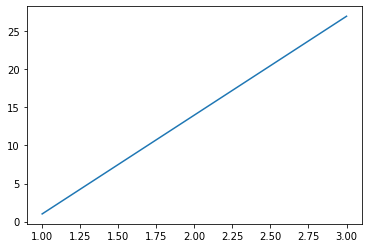

In [ ]:
x=np.linspace(1,3,10)
x0=1
x1=3
x2=4
x3=5.5
y0=1
y1=27
y2=64
y3=166.375
s0=1+13*(x-x0)
s1=27+37*(x-x1)
s2=64+68.5*(x-x2)
m=np.piecewise(x, [x>=1,x>=3,x>=4,  ], [lambda x:1+13*(x-x0),
lambda x:27+37*(x-x1) , lambda x: 64+68.5*(x-x2)])
plt.plot(x,m)
plt.show()

68.25

## Splines cúbicos
$\mathbf{Polinomial  \ a \ trozos \ y \ la \ interpolación \ spline \ cúbica}$


La función $g$ es un polinomio por partes,

$s(x)= \left\{ \begin{array}{lcc}
             s_0(x) &   si  & x_0 \leq x<x_1 \\
              s_1(x) &   si  & x_1 \leq x< x_2 \\
              \vdots  \\
               s_{n-1}(x) &   si  & x_{n-1} \leq x<x_{n}\\
                \end{array}
   \right.$

donde cada $s_i$ es un polinomio de grado $\leq 3$.

1. Entonces . $$s_k(x)=a_k+b_k(x-x_k)+c_k(x-x_k)^2+d_k(x-x_k)^3$$

           
$$s^{'}_k(x)=b_k+2c_k(x-x_k)+3d_k(x-x_k)^2$$

$$s^{''}_k(x)=2c_k+6d_k(x-x_k)$$

2. Ahora $s$ debe de satisfacer las condiciones de interpolación:

   . $s_k(x_k)=f(x_k) \quad (5)$
   
   . $s_k(x_{k+1})=s_{k+1}(x_{k+1})=f(x_{k+1})\quad (6)$
   
   . $(k=0,1,\cdots,n-1) $
   
   
3. Esto garantiza las condiciones de continuidad


4. Las primeras dos derivadas deben de ser continuas po lo que tenemos las siguientes condiciones

    . $s_{k}^{'}(x_{k+1})=s_{k+1}^{'}(x_{k+1}) \quad (k=0,1,\cdots,n-2) \quad (7)$
    
    . $s_{k}^{''}(x_{k+1})=s_{k+1}^{''}(x_{k+1}) \quad (k=0,1,\cdots,n-2)\quad (8)$
    
    
5. estas condiciones nos dan un total $2n+2(n-1)=4n-2$ ecuaciones para las $4n$ coeficientes que se necesitan . Esto nos da dos grados de Libertad
*Splines cubicos naturales*

Primero las condiciones $s_k(x_k)=f(x_k)$  nos dan
$$a_k=f_k \quad(k=0,1,\cdots,n-1)\quad (9)$$

$$b_k+c_k(x_{k+1}-x_k)+d_k(x_{k+1}-x_k)^2=\frac{f_{k+1}-f_k}{x_{k+1}-x_k}=\delta_k \quad (9)$$

 Ahora, de (7) $$b_k+2c_k(x_{k+1}-x_k)+3d_k(x_{k+1}-x_k)^2=\frac{f_{k+1}-f_k}{x_{k+1}-x_k} \quad (10)$$

 definimos $$h_k=x_{k+1}-x_k$$

 subtituyendo en (10)

 $$b_k+2c_kh_k+3d_kh_k^2=\frac{f_{k+1}-f_k}{h_k}=f[x_k,x_{k+1}]=\delta_k \quad (11)$$

Ahora substituyendo en (7) y (8) obtenemos

$$b_k+2c_kh_k+3d_kh_k^2=b_{k+1} \quad (k=0,1,\cdots,n-2)\quad (12)$$

$$2c_kh_k+6d_kh_k=2c_{k+1} \quad (k=0,1,\cdots,n-2)\quad $$

de esto se obtiene

$$ d_k=\frac{c_{k+1}-c_k}{3h_k} \quad (13)$$



substituyendo (13) en (11)


\begin{align}
b_k& = \delta_k-c_kh_k-\frac{(c_{k+1}-c_k)h_k}{3}\\
& = \delta_k-\frac{h_k}{3}(c_{k+1}-2c_k) \quad (14)
\end{align}

Entonces si podemos determinar los coeficientes $c_k$
entonces podemos (13) y (14) para completar los componentes del Spline.

 Substituyendo $b_k,b_{k+1}$ y $d_k$ en (12)

 obtenemos unsistema lineal de ecuaciones para las $c_k$

 $$ \\ \delta_k-\frac{h_k}{3}(c_{k+1}+2c_k)+2c_kh_k+(c_{k+1}-c_k)h_k=\delta_{k+1}-\frac{h_{k+1}}{3}(c_{k+2}+2c_{k+1})$$

 rearreglando términos

 $$h_kc_k+2(k_k+h_{k+1})c_{k+1}+h_{k+1}c_{k+2}=3(\delta_{k+1}-\delta_k)\quad (16) $$

 para $k=0,1,\cdots,n-3$

El resultado es unsistema tridiagonal para los coeficientes $c_k$, sin embargo el sistema tiene solo $n-2$ ecuaciones , y necesitamos $n$  , $c_k^{s}$


**Def** *Los Splines cúbicos naturales* se  definen imponiendo las condiciones extra:


$$s^{''}(a)=s^{''}(b)=0$$

. Estas restricciones implican

$$ s^{''}(a)=s_0^{''}(x_0)=2c_0=0$$

. Y
$$ s^{''}(b)=s_k^{''}(x_n)=2c_{n-1}+6d_{n-1}h_{n-1}=0 \quad (17)$$

. Introduciendo $c_n=0$ la ecuacion(17) se puedes escribir

$$d_{n-1}=\frac{c_n-c_{n-1}}{3h_{n-1}}$$

. lo cual dice que la ecuación (13) se mantiene válida para $k=n-1$ y  la (14) para $k=n-2$


. El sistema Tridiagonal Resultante es :
$$H\begin{bmatrix} % O matrices como esta de 4 x 3
c_1 \\
 c_2 \\
  \vdots \\
 c_{n-1} \\
 \end{bmatrix}
=
3\begin{bmatrix}
\delta_1-\delta_0\\
\delta_2-\delta_1\\
\vdots \\
\delta_{n-1}-\delta_{n-2}
\end{bmatrix},$$

. Donde $H$ es la matriz

$$\begin{bmatrix}
2(h_0+h_1)& h_1 &  &  & \\
h_1 &2(h_1+h_2) & h_2 &  &\\
 & \ddots & \ddots & \ddots& \\
& &h_{n-3} &2(h_{n-3}+h_{n-2}  & h_{n-3} \\
 & & &  h_{n-2}& 2(h_{n-2}+h_{n-1}
\end{bmatrix}$$

$$h_kc_k+2(k_k+h_{k+1})c_{k+1}+h_{k+1}c_{k+2}=3(\delta_{k+1}-\delta_k)\quad (16) $$

**Ejemplo** *Encuentre el spline cubico natural que ajusta los datos

 |*x*|1 4 9 16 25|
 |---|------|
 |*f(x)*|1 2 3 4 5|

In [ ]:
import numpy as np

x=np.array([1,4,9,16,25])
dx=np.diff(x)
dy=np.diff(a)
a=np.array([1,2,3,4,5])
h=np.array([3,5,7,9])
H=np.array([[2*(h[0]+h[1]),h[1],0],[h[1],2*(h[1]+h[2]),h[2]],[0,h[2],2*(h[2]+h[3])]])
ld=3*np.diff(dy/dx)
c=np.linalg.solve(H,ld)
dt=dy/dx

c=np.array([0,-0.0082058 , -0.0004081 , -0.00090279,0])

b=np.array([[d[0]-h[0]/3*(c[1]-c[0])],[d[1]-h[1]/3*(c[2]-c[1])],[d[2]-h[2]/3*(c[3]-c[2])],[d[3]-h[3]/3*(c[3])]])
d=np.array([[(c[1]-c[0])/3*h[0]],[(c[2]-c[1])/3*h[1]],[(c[3]-c[2])/3*h[2]],[(c[4]-c[3])/3*h[3]]])
ld

array([-0.4       , -0.17142857, -0.0952381 ])

$$d_{n-1}=\frac{c_n-c_{n-1}}{3h_{n-1}}$$

$$ d_k=\frac{c_{k+1}-c_k}{3h_k} \quad (13)$$


In [ ]:

z=0.2-0.3333333
z

-0.1333333

**Nota**

  . El uso de la aritmética en arreglos Para generar las$c^{'}s$
  
  . El uso np.diag para inicializar la matriz $H$

+Ejemplo+ grafique la función del error  $s(x)-\sqrt(x)$
para los datos:


 |*x*|1 4 9 16 25|
 |---|------|
 |*f(x)*  |1 2 3 4 5|


In [ ]:
X=np.array([1,4,9,16,25])
Y=np.array([1,2,3,4,5])
d=P1cspline(X,Y)
c,b,d

(array([0., 0., 0., 0., 0.]),
 array([1, 2, 4]),
 (array([1, 2, 3, 4, 5]),
  array([0.35795074, 0.28409851, 0.15489003, 0.12736138]),
  array([-2.73526783e-03,  1.55954160e-03, -7.06710188e-05,  1.00310290e-04])))

In [ ]:
def Pcspline(knots,data,x):
    N=np.size(knots)
    P=np.size(x)
    h=np.diff(knots)
    D=np.diff(data)/h
    dD3=3*np.diff(D)
    a=data[:N]
    # Generando la matriz tridiagonal
    H=(np.diag(2*(h[:-1]+h[1:]))+np.diag(h[1:-1],1)+np.diag(h[1:-1],-1))
    c=np.zeros(N)
    c[1:N-1]=np.linalg.solve(H,dD3)
    b=D-h*(c[1:]+2*c[:-1])/3

    d=(c[1:]-c[:-1])/(3*h)
    s=np.empty(P)
    for i in range(P):
        indices=np.argwhere(x[i]>knots)
        if indices.size>0:
            k=indices.flat[-1]
            # x[i] se encuentra en el intervalo
            #( knots[k], knots[k+1])
        elif x[i]==knots[0]:
            k=0 #caso especial incluye x
                #en el primer intervalo
                #( knots[k], knots[k+1])
        else:
            raise ValueError('cspline no soporta\
                             valores de extrapolacion\
                                 fuera de los intervalos\
                                     de los nodos')
        z=x[i]-knots[k]
    s[i]=a[k]+z*(b[k]+z*(c[k]+z*d[k]))

    return s

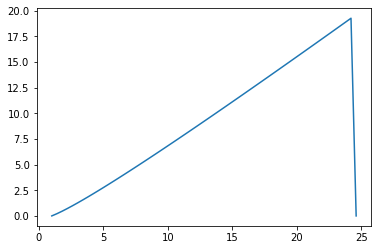

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=np.array([1.,4.,9.,16.,25.])
Y=np.array([1.,2.,3.,4.,5.])
x=np.arange(1,25,.4)
y=Pcspline(X,Y,x)
plt.plot(x,y-np.sqrt(x))
plt.show()


In [ ]:
# %load prg_cubicspline
"""
Created on Thu Jul 16 19:50:57 2020

@author: Francisco Salem
"""


import numpy as np
def cspline(knots,data,x):
    N=np.size(knots)
    P=np.size(x)
    h=np.diff(knots)
    D=np.diff(data)/h
    dD3=3*np.diff(D)
    a=data[:N]
    # Generando la matriz tridiagonal
    H=(np.diag(2*(h[:-1]+h[1:]))+np.diag(h[1:-1],1)+np.diag(h[1:-1],-1))
    c=np.zeros(N)
    c[1:N-1]=np.linalg.solve(H,dD3)
    b=D-h*(c[1:]+2*c[:-1])/3
    d=(c[1:]-c[:-1])/(3*h)
    # Evalue el spline en x
    s=np.empty(P)
    for i in range(P):
        indices=np.argwhere(x[i]>knots)
        if indices.size>0:
            k=indices.flat[-1]
            # x[i] se encuentra en el intervalo
            #( knots[k], knots[k+1])
        elif x[i]==knots[0]:
            k=0 #caso especial incluye x
                #en el primer intervalo
                #( knots[k], knots[k+1])
        else:
            raise ValueError('cspline no soporta\
                             valores de extrapolacion\
                                 fuera de los intervalos\
                                     de los nodos')
        z=x[i]-knots[k]
    s[i]=a[k]+z*(b[k]+z*(c[k]+z*d[k]))

    return s


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from prg_cubicspline import cspline
X=np.array([1,4,9,16,25])
Y=np.array([1,2,3,4,5])
x=np.arange(1,25,.4)
y=Pcspline(X,Y,x)
plt.plot(x,y-np.sqrt(x))
plt.show()

TypeError: unsupported operand type(s) for -: 'NoneType' and 'float'

In [ ]:
g=np.array([1,2,4,5])
a=g[1:]
b=g[:-1]
a+2*b

array([ 4,  8, 13])

In [ ]:
c=np.zeros(5)
N=len(c)
c[1:N-1]

array([0., 0., 0.])

In [ ]:
def Pcspline(knots,data,x):
    N=np.size(knots)
    P=np.size(x)
    h=np.diff(knots)
    D=np.diff(data)/h
    dD3=3*np.diff(D)
    a=data[:N]
    # Generando la matriz tridiagonal
    H=(np.diag(2*(h[:-1]+h[1:]))+np.diag(h[1:-1],1)+np.diag(h[1:-1],-1))
    c=np.zeros(N)
    c[1:N-1]=np.linalg.solve(H,dD3)
    b=D-h*(c[1:]+2*c[:-1])/3

    d=(c[1:]-c[:-1])/(3*h)
     # Evalue el spline en x
    s=np.empty(P)
    for i in range(P):
        indices=np.argwhere(x[i]>knots)
        if indices.size>0:
            k=indices.flat[-1]
            # x[i] se encuentra en el intervalo
            #( knots[k], knots[k+1])
        elif x[i]==knots[0]:
            k=0 #caso especial incluye x
                #en el primer intervalo
                #( knots[k], knots[k+1])
        else:
            raise ValueError('cspline no soporta\
                             valores de extrapolacion\
                                 fuera de los intervalos\
                                     de los nodos')
        z=x[i]-knots[k]
        s[i]=a[k]+z*(b[k]+z*(c[k]+z*d[k]))
    return s



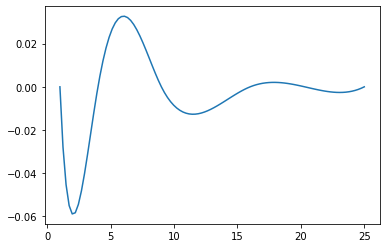

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
X=np.array([1.,4.,9.,16.,25.])
Y=np.array([1.,2.,3.,4.,5.])
x=np.linspace(1,25,100)
y=Pcspline(X,Y,x)
plt.plot(x,y-np.sqrt(x))
plt.show()
